### Simple Regression
### What is Simple Linear Regression?
#### Think of it like this:
#### You want to predict the price of a laptop based on how much RAM it has.
#### assume there's a straight-line relationship between these two things.
#### The more RAM a laptop has, the more expensive it usually is.

#### Simple Linear Regression finds the best straight line that fits this pattern.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
laptop = pd.read_csv('laptop.csv')
laptop.sample(5)

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
430,450,514,MSI,Creator Pro M16 A12UIS-634IN Gaming Laptop,85590,79.000000,12th Gen Intel Core i7 12700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,1TB,SSD,4GB NVIDIA GeForce RTX A1000,16.0,2560.0,1660.0,Windows 11 OS,2
269,285,320,Asus,Vivobook Pro 15 M6500QF-HN541WS Creator Laptop,62390,63.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",16GB,DDR4,512GB,SSD,4GB NVIDIA GeForce GTX 2050,15.6,1920.0,1080.0,Windows 11 OS,1
296,315,354,Dell,Inspiron 7430 2 in 1 Laptop,61490,69.323529,13th Gen Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,LPDDR5,1TB,SSD,Intel UHD Graphics,14.0,1920.0,1200.0,Windows 11 OS,1
35,36,37,HP,Pavilion 15-eg3081TU Laptop,71990,66.000000,13th Gen Intel Core i5 1340P,"12 Cores (4P + 8E), 16 Threads",16GB,DDR4,512GB,SSD,Intel Integrated Integrated,15.6,1920.0,1080.0,Windows 11 OS,1
83,85,88,MSI,Thin GF63 11UCX-1492IN Gaming Laptop,53990,73.000000,11th Gen Intel Core i5 11260H,"Hexa Core, 12 Threads",16GB,DDR4,1TB,Hard-Disk,GB NVIDIA GeForce RTX 2050,15.6,1920.0,1080.0,Windows 11 OS,1


In [3]:
X = laptop['Ram'].str.extract(r'(\d+)').astype(int) #more rams means more expensive laptop 
y = laptop['price'] # target value

In [4]:
#train test split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()

In [6]:
print("Slope (m):", lrmodel.coef_[0])  # How much price changes per GB
print("Intercept (b):", lrmodel.intercept_)  # Base price

Slope (m): 6821.096278270461
Intercept (b): -9988.657059291814


In [10]:
y_pred = lrmodel.predict(X_test)

In [16]:
#mean absolute error provides avg range of model mistakes here we predicted ram against price so for that it is providing mean erro 27489 rs
# mostly mae should be around 1000 if its more than that we need to apply tuning or log loss function to get it near 0 value
mae = mean_absolute_error(y_test,y_pred)
print("Mean absolute error: ", mae)

Mean absolute error:  27489.332611694845


In [17]:
#predicting linear regression model score
regression_score = lrmodel.score(X_test,y_test)
print(regression_score*100,'%')

56.035714244357735 %


In [19]:
import matplotlib.pyplot as plt

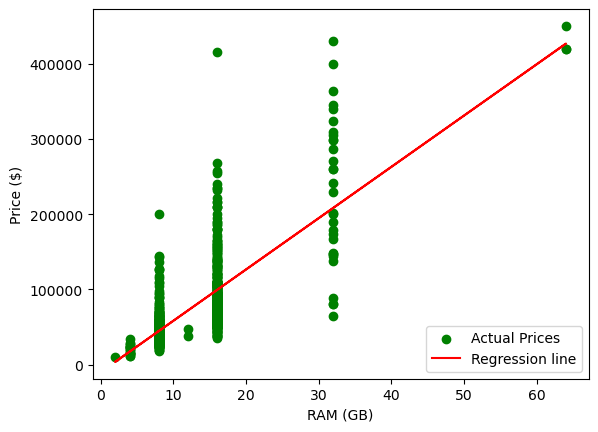

In [25]:
# sp = sns.scatterplot(data=X_train, x=X_train, y=y_train, palette="blue")
# lp = sns.lineplot(data = X_train, x=X_train, y=lrmodel.predict(X_train), palette="red")
# sp.set(xlabel="RAM (GB)", ylabel="Price (₹)")

plt.scatter(X_train, y_train, color='green', label="Actual Prices")
plt.plot(X_train, lrmodel.predict(X_train), color='red', label="Regression line")
plt.xlabel("RAM (GB)")
plt.ylabel("Price ($)")
plt.legend()
plt.show()